Official Link: https://whc.unesco.org
Data Link: https://whc.unesco.org/en/list/xml
"Copyright © 1992 - 2024 UNESCO/World Heritage Centre. All rights reserved."

In [27]:
import numpy as np
import pandas as pd
import io

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
with open('raw_files/whc-en.xml', 'r', encoding="utf8") as f:
    raw_xml = f.read()
    
sites = pd.read_xml(io.StringIO(raw_xml))

In [15]:
print(sites.shape)
print(sites.columns)

(1199, 21)
Index(['category', 'criteria_txt', 'danger', 'date_inscribed', 'extension',
       'http_url', 'id_number', 'image_url', 'iso_code', 'justification',
       'latitude', 'location', 'longitude', 'region', 'revision',
       'secondary_dates', 'short_description', 'site', 'states',
       'transboundary', 'unique_number'],
      dtype='object')


In [21]:
# Columns with null entries
na_pct = sites.isna().sum() / len(sites)
na_pct[na_pct > 0]

danger             0.948290
iso_code           0.000834
justification      0.724771
latitude           0.000834
location           0.350292
longitude          0.000834
secondary_dates    0.922435
dtype: float64

In [22]:
# Which entries have null iso?
sites[sites['iso_code'].isna()]

,category,criteria_txt,danger,date_inscribed,extension,http_url,id_number,image_url,iso_code,justification,...,location,longitude,region,revision,secondary_dates,short_description,site,states,transboundary,unique_number
662,Cultural,(ii)(iii)(vi),Y 1982,1981,0,https://whc.unesco.org/en/list/148,148,https://whc.unesco.org/uploads/sites/site_148.jpg,None,None,...,Jerusalem District,35.231667,Arab States,0,None,"<p>As a holy city for Judaism, Christianity an...",Old City of Jerusalem and its Walls,Jerusalem (Site proposed by Jordan),0,165


In [26]:
# Which entries have null long and lat?
sites[np.logical_or(sites['latitude'].isna(), sites['longitude'].isna())]

,category,criteria_txt,danger,date_inscribed,extension,http_url,id_number,image_url,iso_code,justification,...,location,longitude,region,revision,secondary_dates,short_description,site,states,transboundary,unique_number
13,Cultural,(iii)(iv)(vi),None,2023,0,https://whc.unesco.org/en/list/1567,1567,https://whc.unesco.org/uploads/sites/site_1567...,"be,fr",None,...,None,NaN,Europe and North America,0,None,This transnational serial property encompasses...,Funerary and memory sites of the First World W...,"Belgium,France",1,2559


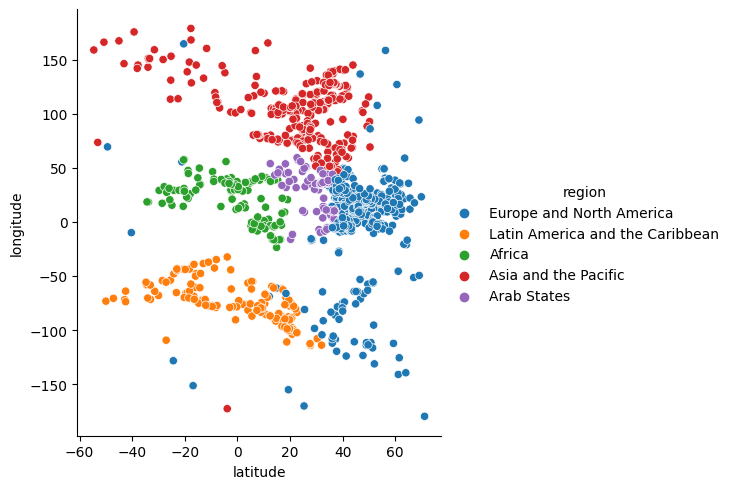

In [39]:
sns.relplot(data=sites,
            x='latitude', y='longitude',
            kind='scatter',
            hue='region')

- parse html details from short_desc
- split listed attributes into lists

In [ ]:
comma_sep_cols = ['iso_code']

In [18]:
sites['danger'].value_counts()

danger
0                          4
Y 1997                     3
Y 2003                     3
Y 1992                     2
Y 2012                     2
Y 2010                     2
Y 2007                     2
Y 2013                     2
Y 2014                     2
1                          2
P 1984-1989                1
P 1988-2004                1
Y 2012 P 1990-2005         1
Y 2005                     1
Y 2010 P 1993-2007         1
P 1979-2003                1
P 1995-2003                1
P 2003-2007                1
Y 1986                     1
P 2000-2012                1
P 2004-2014                1
P 2001-2012                1
P 2000-2006 P 1984-1988    1
Y 2006                     1
P 1996-2006                1
P 1999-2004                1
Y 1982                     1
Y 2011 P 1996-2007         1
P 1999-2006                1
Y 1992-2011                1
Y 2002                     1
P 2002-2006                1
P 2003-2009                1
P 1999-2001                1
P 1992-

Columns to Check:
- [x] Category
- [ ] Criteria
- [ ] Danger
- [ ] Date
- [ ] Extension
- [ ] HTTP URL
- [ ] ID
- [ ] Image URL
- [ ] ISO
- [ ] Justification
- [ ] Latitude
- [ ] Longitude
- [ ] Location
- [ ] Region
- [ ] Revision
- [ ] Secondary Dates
- [ ] Short Desc
- [ ] Site
- [ ] States
- [ ] Transboundary
- [ ] Unique Number

In [ ]:
comma_sep_cols = ['iso_code', 'region', 'states']

In [11]:
sites['transboundary'].value_counts()

transboundary
0    1151
1      48
Name: count, dtype: int64